In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import seaborn as sns


# Exploring Data



In [2]:
df = pd.read_csv('..\datasets\chicago_taxi_train.csv')

df.describe(include='all')

,TRIP_START_TIMESTAMP,TRIP_END_TIMESTAMP,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,PICKUP_CENSUS_TRACT,DROPOFF_CENSUS_TRACT,PICKUP_COMMUNITY_AREA,DROPOFF_COMMUNITY_AREA,FARE,TIPS,TIP_RATE,TOLLS,EXTRAS,TRIP_TOTAL,PAYMENT_TYPE,COMPANY
count,31694,31694.000000,31694.000000,31694,31661.000000,31694.000000,1.325900e+04,1.402300e+04,28477.000000,28199.000000,31694.000000,31694.000000,31694.000000,31694.000000,31694.000000,31694.000000,31694,31694
unique,193,NaN,NaN,3741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,31
top,5/17/2022 17:00,NaN,NaN,420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Credit Card,Flash Cab
freq,331,NaN,NaN,415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14142,7887
mean,NaN,44698.159318,14.185635,NaN,8.295804,20.256544,1.703153e+10,1.703140e+10,35.562138,25.550410,23.905210,3.246130,12.965785,0.002744,2.410468,29.755053,NaN,NaN
std,NaN,0.546450,5.159454,NaN,7.266178,11.110390,3.827747e+05,3.408106e+05,26.421367,20.349707,16.970022,4.284567,15.517765,0.164343,5.805087,23.145537,NaN,NaN
min,NaN,44697.208330,0.000000,NaN,0.500000,4.000000,1.703102e+10,1.703101e+10,1.000000,1.000000,3.250000,0.000000,0.000000,0.000000,0.000000,3.250000,NaN,NaN
25%,NaN,44697.645830,10.500000,NaN,1.720000,11.000000,1.703108e+10,1.703108e+10,8.000000,8.000000,9.000000,0.000000,0.000000,0.000000,0.000000,10.750000,NaN,NaN
50%,NaN,44698.291670,14.750000,NaN,5.940000,17.600000,1.703132e+10,1.703132e+10,32.000000,28.000000,18.750000,2.000000,12.200000,0.000000,0.000000,21.700000,NaN,NaN
75%,NaN,44698.666670,18.000000,NaN,14.510000,27.500000,1.703198e+10,1.703184e+10,59.000000,32.000000,38.750000,5.000000,20.800000,0.000000,4.000000,48.265000,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31694 entries, 0 to 31693
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TRIP_START_TIMESTAMP    31694 non-null  object 
 1   TRIP_END_TIMESTAMP      31694 non-null  float64
 2   TRIP_START_HOUR         31694 non-null  float64
 3   TRIP_SECONDS            31694 non-null  object 
 4   TRIP_MILES              31661 non-null  float64
 5   TRIP_SPEED              31694 non-null  float64
 6   PICKUP_CENSUS_TRACT     13259 non-null  float64
 7   DROPOFF_CENSUS_TRACT    14023 non-null  float64
 8   PICKUP_COMMUNITY_AREA   28477 non-null  float64
 9   DROPOFF_COMMUNITY_AREA  28199 non-null  float64
 10  FARE                    31694 non-null  float64
 11  TIPS                    31694 non-null  float64
 12  TIP_RATE                31694 non-null  float64
 13  TOLLS                   31694 non-null  float64
 14  EXTRAS                  31694 non-null

we noticed some missing values in trip miles

In [4]:
df.head(100)

,TRIP_START_TIMESTAMP,TRIP_END_TIMESTAMP,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,PICKUP_CENSUS_TRACT,DROPOFF_CENSUS_TRACT,PICKUP_COMMUNITY_AREA,DROPOFF_COMMUNITY_AREA,FARE,TIPS,TIP_RATE,TOLLS,EXTRAS,TRIP_TOTAL,PAYMENT_TYPE,COMPANY
0,5/17/2022 7:15,44698.32292,7.25,2341,2.57,4.0,NaN,NaN,NaN,17.0,31.99,2.00,6.3,0.0,0.0,33.99,Mobile,Flash Cab
1,5/17/2022 17:15,44698.72917,17.25,1074,1.18,4.0,NaN,1.703108e+10,NaN,8.0,9.75,3.00,27.9,0.0,1.0,14.25,Credit Card,Flash Cab
2,5/17/2022 17:15,44698.72917,17.25,1173,1.29,4.0,1.703132e+10,1.703108e+10,32.0,8.0,10.25,0.00,0.0,0.0,0.0,10.25,Cash,Sun Taxi
3,5/17/2022 18:00,44698.79167,18.00,3360,3.70,4.0,1.703132e+10,1.703124e+10,32.0,24.0,23.75,0.00,0.0,0.0,1.0,24.75,Cash,Choice Taxi Association
4,5/17/2022 17:00,44698.72917,17.00,1044,1.15,4.0,1.703132e+10,1.703108e+10,32.0,8.0,10.00,0.00,0.0,0.0,0.0,10.00,Cash,Flash Cab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5/17/2022 17:00,44698.71875,17.00,1116,1.40,4.5,1.703132e+10,1.703108e+10,32.0,8.0,10.50,0.00,0.0,0.0,0.0,10.50,Cash,Chicago Independents
96,5/17/2022 17:45,44698.76042,17.75,1283,1.61,4.5,1.703132e+10,1.703183e+10,32.0,28.0,9.00,1.55,17.2,0.0,0.0,10.55,Mobile,Flash Cab
97,5/16/2022 13:15,44697.55208,13.25,494,0.62,4.5,NaN,NaN,8.0,8.0,6.25,0.00,0.0,0.0,0.0,6.25,Cash,Flash Cab
98,5/16/2022 10:45,44697.46875,10.75,2156,2.71,4.5,NaN,NaN,6.0,3.0,17.50,0.00,0.0,0.0,0.0,17.50,Prcard,Flash Cab


we also noticed some ? mark in trip seconds

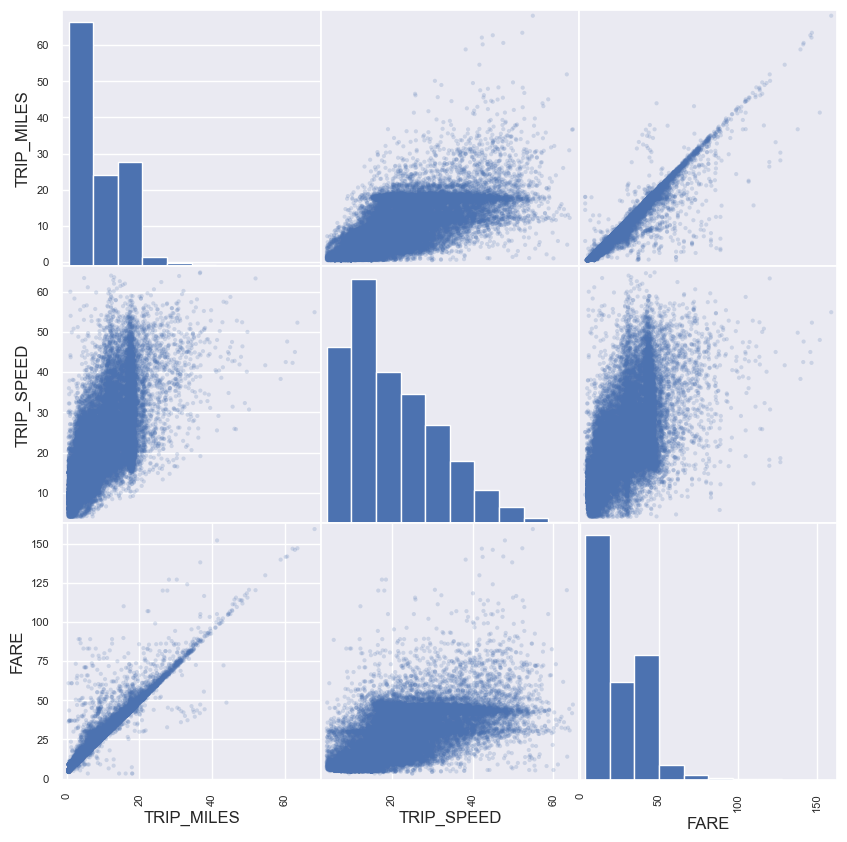

In [5]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


attributes = ['TRIP_MILES', 'TRIP_SECONDS', 'TRIP_SPEED', 'FARE']
scatter_matrix(df[attributes], alpha=0.2, figsize=(10, 10))


plt.show()

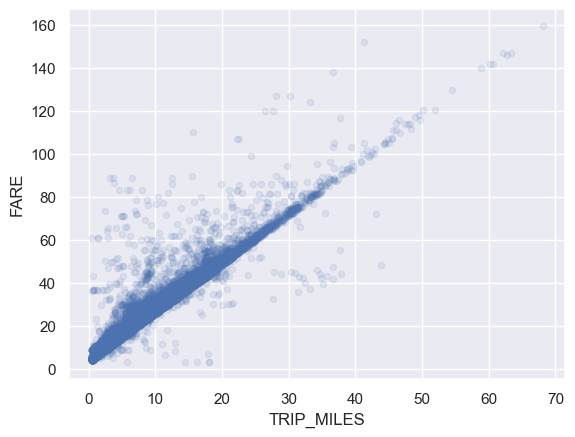

In [6]:
import plotly.express as px



df.plot(kind='scatter', x='TRIP_MILES', y='FARE', alpha=0.1)
plt.show()

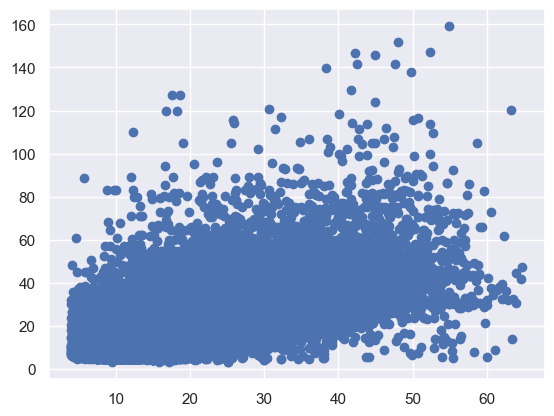

In [7]:
plt.scatter(df['TRIP_SPEED'],df['FARE'])

we noticed that the most signficant feature are trip mile and and maybe the trip seconds 

In [8]:
mean_trip_miles = df['TRIP_MILES'].mean()

mean_trip_miles
df

,TRIP_START_TIMESTAMP,TRIP_END_TIMESTAMP,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,PICKUP_CENSUS_TRACT,DROPOFF_CENSUS_TRACT,PICKUP_COMMUNITY_AREA,DROPOFF_COMMUNITY_AREA,FARE,TIPS,TIP_RATE,TOLLS,EXTRAS,TRIP_TOTAL,PAYMENT_TYPE,COMPANY
0,5/17/2022 7:15,44698.32292,7.25,2341,2.57,4.0,NaN,NaN,NaN,17.0,31.99,2.00,6.3,0.0,0.0,33.99,Mobile,Flash Cab
1,5/17/2022 17:15,44698.72917,17.25,1074,1.18,4.0,NaN,1.703108e+10,NaN,8.0,9.75,3.00,27.9,0.0,1.0,14.25,Credit Card,Flash Cab
2,5/17/2022 17:15,44698.72917,17.25,1173,1.29,4.0,1.703132e+10,1.703108e+10,32.0,8.0,10.25,0.00,0.0,0.0,0.0,10.25,Cash,Sun Taxi
3,5/17/2022 18:00,44698.79167,18.00,3360,3.70,4.0,1.703132e+10,1.703124e+10,32.0,24.0,23.75,0.00,0.0,0.0,1.0,24.75,Cash,Choice Taxi Association
4,5/17/2022 17:00,44698.72917,17.00,1044,1.15,4.0,1.703132e+10,1.703108e+10,32.0,8.0,10.00,0.00,0.0,0.0,0.0,10.00,Cash,Flash Cab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31689,5/17/2022 13:15,44698.56250,13.25,739,13.06,63.6,NaN,NaN,75.0,28.0,32.50,0.00,0.0,0.0,0.0,32.50,Prcard,Blue Ribbon Taxi Association
31690,5/17/2022 21:45,44698.92708,21.75,1740,30.90,63.9,NaN,NaN,76.0,NaN,44.50,10.00,13.9,0.0,27.5,82.00,Credit Card,Choice Taxi Association
31691,5/18/2022 3:45,44699.16667,3.75,687,12.21,64.0,NaN,NaN,22.0,NaN,30.75,0.00,0.0,0.0,0.0,30.75,Prcard,Sun Taxi
31692,5/16/2022 14:45,44697.64583,14.75,2040,36.60,64.6,NaN,NaN,76.0,7.0,41.75,11.55,25.2,0.0,4.0,57.30,Credit Card,"Taxicab Insurance Agency, LLC"


# preporcessing

In [9]:

df['TRIP_MILES']=df['TRIP_MILES'].replace("",np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31694 entries, 0 to 31693
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TRIP_START_TIMESTAMP    31694 non-null  object 
 1   TRIP_END_TIMESTAMP      31694 non-null  float64
 2   TRIP_START_HOUR         31694 non-null  float64
 3   TRIP_SECONDS            31694 non-null  object 
 4   TRIP_MILES              31661 non-null  float64
 5   TRIP_SPEED              31694 non-null  float64
 6   PICKUP_CENSUS_TRACT     13259 non-null  float64
 7   DROPOFF_CENSUS_TRACT    14023 non-null  float64
 8   PICKUP_COMMUNITY_AREA   28477 non-null  float64
 9   DROPOFF_COMMUNITY_AREA  28199 non-null  float64
 10  FARE                    31694 non-null  float64
 11  TIPS                    31694 non-null  float64
 12  TIP_RATE                31694 non-null  float64
 13  TOLLS                   31694 non-null  float64
 14  EXTRAS                  31694 non-null

In [10]:
mean_trip_miles = df['TRIP_MILES'].mean()

mean_trip_miles



8.295803670130445

In [11]:

df['TRIP_MILES']=df['TRIP_MILES'].fillna(mean_trip_miles)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31694 entries, 0 to 31693
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TRIP_START_TIMESTAMP    31694 non-null  object 
 1   TRIP_END_TIMESTAMP      31694 non-null  float64
 2   TRIP_START_HOUR         31694 non-null  float64
 3   TRIP_SECONDS            31694 non-null  object 
 4   TRIP_MILES              31694 non-null  float64
 5   TRIP_SPEED              31694 non-null  float64
 6   PICKUP_CENSUS_TRACT     13259 non-null  float64
 7   DROPOFF_CENSUS_TRACT    14023 non-null  float64
 8   PICKUP_COMMUNITY_AREA   28477 non-null  float64
 9   DROPOFF_COMMUNITY_AREA  28199 non-null  float64
 10  FARE                    31694 non-null  float64
 11  TIPS                    31694 non-null  float64
 12  TIP_RATE                31694 non-null  float64
 13  TOLLS                   31694 non-null  float64
 14  EXTRAS                  31694 non-null

In [12]:

df[df['TRIP_SECONDS']=='?']


,TRIP_START_TIMESTAMP,TRIP_END_TIMESTAMP,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,PICKUP_CENSUS_TRACT,DROPOFF_CENSUS_TRACT,PICKUP_COMMUNITY_AREA,DROPOFF_COMMUNITY_AREA,FARE,TIPS,TIP_RATE,TOLLS,EXTRAS,TRIP_TOTAL,PAYMENT_TYPE,COMPANY
20,5/16/2022 9:00,44697.39583,9.00,?,1.390000,4.1,1.703184e+10,1.703184e+10,32.0,32.0,11.50,0.00,0.0,0.0,0.0,11.50,Cash,Medallion Leasin
21,5/17/2022 17:45,44698.73958,17.75,?,0.520000,4.1,1.703108e+10,1.703108e+10,8.0,8.0,6.00,4.00,66.7,0.0,0.0,10.50,Credit Card,Flash Cab
22,5/17/2022 17:15,44698.72917,17.25,?,1.000000,4.1,1.703108e+10,1.703184e+10,8.0,32.0,9.00,0.00,0.0,0.0,0.0,10.95,Cash,Taxicab Insurance Agency Llc
23,5/17/2022 7:00,44698.30208,7.00,?,1.010000,4.1,NaN,NaN,8.0,24.0,9.00,0.00,0.0,0.0,0.0,9.00,Cash,Flash Cab
55,5/17/2022 18:15,44698.77083,18.25,?,1.000000,4.3,1.703128e+10,1.703183e+10,28.0,28.0,8.50,2.00,23.5,0.0,0.0,10.50,Credit Card,Taxi Affiliation Services
56,5/17/2022 12:15,44698.52083,12.25,?,0.500000,4.3,1.703108e+10,1.703108e+10,8.0,8.0,5.50,0.00,0.0,0.0,0.0,5.50,Cash,Choice Taxi Association
57,5/17/2022 8:45,44698.37500,8.75,?,0.500000,4.3,1.703184e+10,1.703184e+10,32.0,32.0,6.00,0.00,0.0,0.0,0.0,6.00,Cash,Top Cab Affiliation
58,5/16/2022 16:30,44697.69792,16.50,?,1.000000,4.3,NaN,NaN,7.0,7.0,8.50,0.00,0.0,0.0,1.0,9.50,Unknown,Taxi Affiliation Services
59,5/16/2022 9:15,44697.38542,9.25,?,0.500000,4.3,1.703108e+10,1.703108e+10,8.0,8.0,5.75,0.00,0.0,0.0,0.0,5.75,Cash,Choice Taxi Association
60,5/17/2022 14:00,44698.59375,14.00,?,1.050000,4.3,1.703108e+10,1.703132e+10,8.0,32.0,9.00,0.00,0.0,0.0,0.0,9.00,Cash,Sun Taxi


In [13]:
df['TRIP_SECONDS']=df['TRIP_SECONDS'].replace("?",np.nan)

df['TRIP_SECONDS'] = pd.to_numeric(df['TRIP_SECONDS'])

mean_trip_seconds = df['TRIP_SECONDS'].mean()

df['TRIP_SECONDS']=df['TRIP_SECONDS'].fillna(mean_trip_seconds)

df.info()






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31694 entries, 0 to 31693
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TRIP_START_TIMESTAMP    31694 non-null  object 
 1   TRIP_END_TIMESTAMP      31694 non-null  float64
 2   TRIP_START_HOUR         31694 non-null  float64
 3   TRIP_SECONDS            31694 non-null  float64
 4   TRIP_MILES              31694 non-null  float64
 5   TRIP_SPEED              31694 non-null  float64
 6   PICKUP_CENSUS_TRACT     13259 non-null  float64
 7   DROPOFF_CENSUS_TRACT    14023 non-null  float64
 8   PICKUP_COMMUNITY_AREA   28477 non-null  float64
 9   DROPOFF_COMMUNITY_AREA  28199 non-null  float64
 10  FARE                    31694 non-null  float64
 11  TIPS                    31694 non-null  float64
 12  TIP_RATE                31694 non-null  float64
 13  TOLLS                   31694 non-null  float64
 14  EXTRAS                  31694 non-null

In [14]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

scaler.fit(df[['TRIP_MILES','TRIP_SECONDS']])

StandardScaler()

In [15]:
from sklearn.model_selection import train_test_split

X = df[['TRIP_MILES','TRIP_SECONDS']]
y = df['FARE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [16]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

# from sklearn.linear_model import SGDRegressor

# sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)

# sgd_reg.fit(X_train, y_train)

# y_pred = sgd_reg.predict(X_test)


In [17]:
import plotly.graph_objects as go

test_results = X_test.copy()
test_results['Actual_Fare'] = y_test
test_results['Predicted_Fare'] = y_pred

x_range = np.linspace(X['TRIP_MILES'].min(), X['TRIP_MILES'].max(), 50)
y_range = np.linspace(X['TRIP_SECONDS'].min(), X['TRIP_SECONDS'].max(), 50)
xx, yy = np.meshgrid(x_range, y_range)
grid = pd.DataFrame({'TRIP_MILES': xx.ravel(), 'TRIP_SECONDS': yy.ravel()})
zz = lin_reg.predict(grid).reshape(xx.shape)

scatter = go.Scatter3d(
    x=test_results['TRIP_MILES'],
    y=test_results['TRIP_SECONDS'],
    z=test_results['Actual_Fare'],
    mode='markers',
    marker=dict(size=4, color='blue', opacity=0.6),
    name='Actual Fare'
)

surface = go.Surface(
    x=xx,
    y=yy,
    z=zz,
    colorscale='Viridis',
    opacity=0.7,
    name='Predicted Fare Surface'
)

fig = go.Figure(data=[scatter, surface])

fig.update_layout(
    title='3D Plot of Fare vs. Trip Miles and Trip Seconds',
    scene=dict(
        xaxis_title='Trip Miles',
        yaxis_title='Trip Seconds',
        zaxis_title='Fare'
    ),
    legend=dict(x=0.8, y=0.9)
)

fig.show()

In [18]:
import yfinance as yf
import pandas as pd

ticker = 'AAPL'  # Example: Apple Inc.
start_date = '2020-01-01'
end_date = '2023-12-31'

data = yf.download(ticker, start=start_date, end=end_date)

print(data.head())

data.to_csv(f'{ticker}_stock_prices.csv')

[*********************100%***********************]  1 of 1 completed

Price       Adj Close      Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                                        
2020-01-02  72.796028  75.087502  75.150002  73.797501  74.059998  135480400
2020-01-03  72.088287  74.357498  75.144997  74.125000  74.287498  146322800
2020-01-06  72.662720  74.949997  74.989998  73.187500  73.447502  118387200
2020-01-07  72.320969  74.597504  75.224998  74.370003  74.959999  108872000
2020-01-08  73.484352  75.797501  76.110001  74.290001  74.290001  132079200


Text(0.5, 1.0, 'Y_hat to the target')

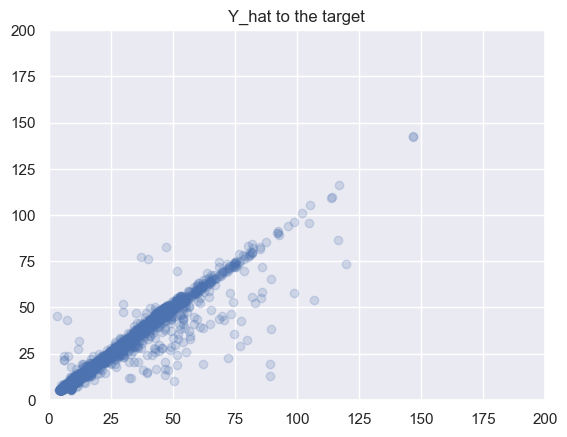

In [19]:
plt.scatter(y_test,y_pred,alpha=0.2)
plt.xlim(0,200)
plt.ylim(0,200)
plt.title("Y_hat to the target")

In [20]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_test, y_pred)

lin_rmse = np.sqrt(lin_mse)

mean_actual = y_test.mean()

accuracy = 1 - (lin_rmse / mean_actual)

accuracy*100



84.80368350018622

In [21]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred2 = knn.predict(X_test)

knn_mse = mean_squared_error(y_test, y_pred2)
knn_rmse = np.sqrt(knn_mse)

y_test_reset = y_test.reset_index(drop=True)

comparison_df = pd.DataFrame({
    'Actual': y_test_reset,
    'Predicted': y_pred2
})

print(comparison_df)
print(f"MSE of KNN Regression model: {knn_mse:.2f}")
print(f"RMSE of KNN Regression model: {knn_rmse:.2f}")



# accuracy = 1 - (knn_mse / knn_rmse)

# accuracy*100

      Actual   Predicted
0      14.84   14.876667
1       4.75    6.166667
2      33.50   34.800000
3      23.00   23.583333
4       9.68    8.923333
...      ...         ...
6334   16.00   16.083333
6335   51.56  108.333333
6336   46.25   47.166667
6337    4.75    4.666667
6338   18.04   15.416667

[6339 rows x 2 columns]
MSE of KNN Regression model: 23.27
RMSE of KNN Regression model: 4.82
